# Lab 5

## Higgs Classification

In this project we are going to look at an inclusive search for the standard model Higgs boson in pp collisions at √ s = 13 TeV at the LHC using simulated data [A. Schuy]. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet[Phys. Rev. Lett. 120, 071802 (2018)]. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data.

Both of you will use the same training samples for analysis. Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR' [Eur. Phys. J. C 79 (2019) 836]. You can explore different strategies for event selection optimization using training samples. The optimal event selection will be applied to pseudo-experiment data.

For this lab, I'll be working on the 1000-1200 data set.

In [98]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import pickle
import math

plt.rcParams["figure.figsize"] = (20,15)

In [99]:
infile = open ('higgs_100000_pt_1000_1200.pkl','rb')
data = pickle.load(infile)
data.keys()

file = open ('qcd_100000_pt_1000_1200.pkl','rb')
background = pickle.load(file)
background.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

There are 14 features:
 - 'pt': is the transverse momentum  of the collision in x-y plane.
 - 'eta': the angle of the particle in the z-y plane.
 - 'phi': the angle of the particle in x-y plane
 - 'mass': is the portion of the total mass of an object or system of objects that is independent of the overall motion of the system
 - 'ee2': 2-point of ECF(Engergy correlation function)
 - 'ee3': 3-point of ECF 
 - 'd2': is the ratio of ee3/ee2
 - 'angularity': the orientation of one feature to another at a referenced angle.
 - 't1': 1 subjettiness
 - 't2': 2 subjettiness
 - 't3': 3 subjettiness
 - 't21': 21 subjettiness
 - 't32': 32 subjettiness
 - 'KtDeltaR': delta R of two subjets within the large-R jet

Text(0.5, 1.0, 'transverse momentum bckgrd')

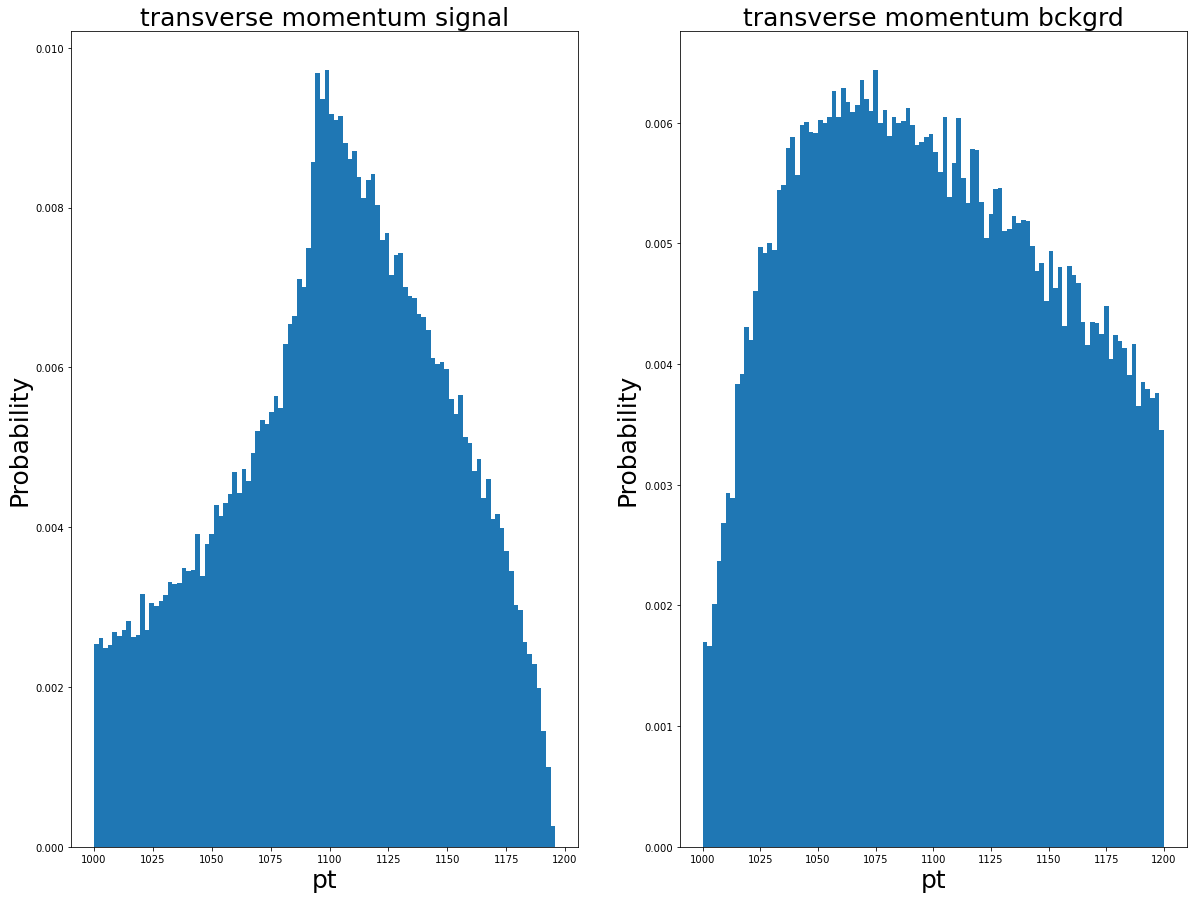

In [100]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['pt'],density=True,bins=100)
ax2.hist(background['pt'],density=True,bins=100)
ax1.set_xlabel('pt', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('transverse momentum signal',size=25)
ax2.set_xlabel('pt', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('transverse momentum bckgrd',size=25)

Text(0.5, 1.0, 'Histogram of eta bckgrd')

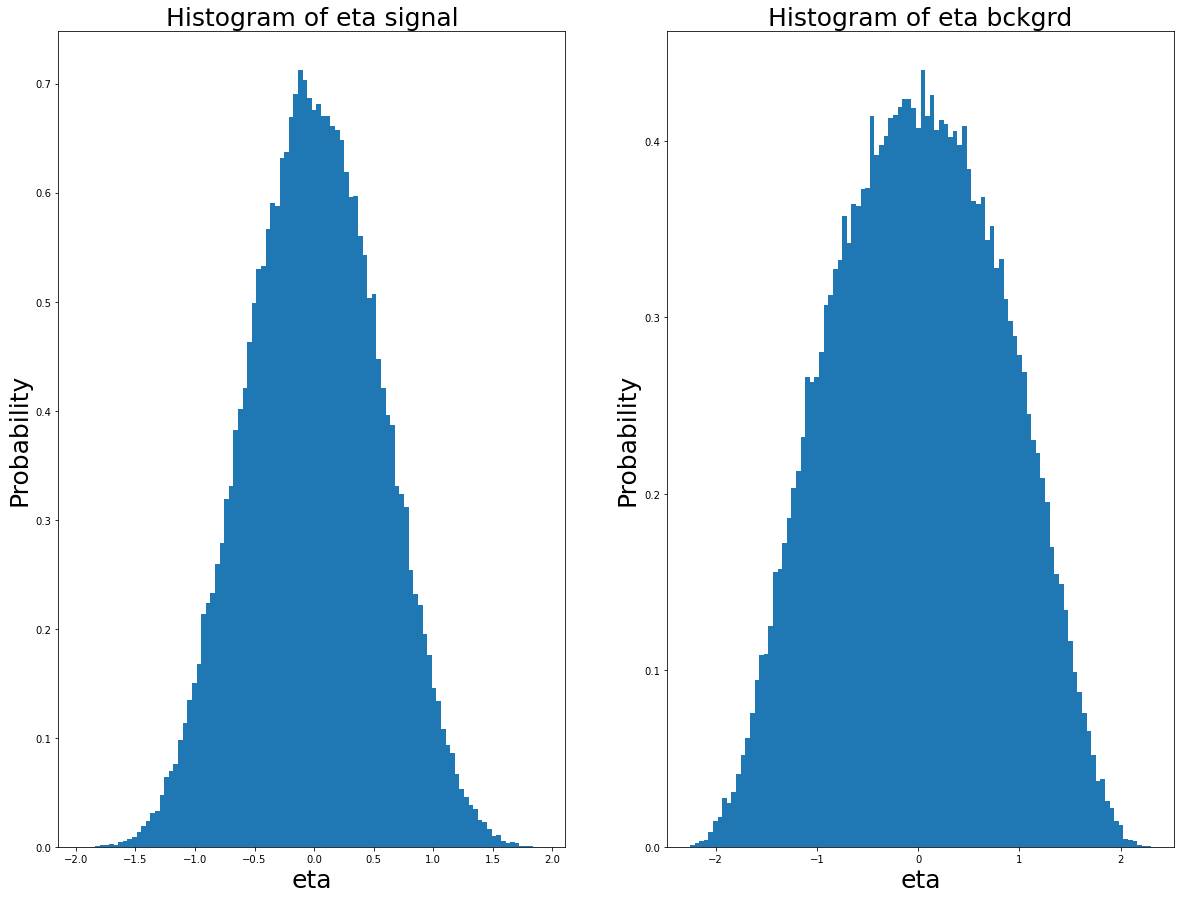

In [101]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['eta'],density=True,bins=100)
ax2.hist(background['eta'],density=True,bins=100)
ax1.set_xlabel('eta', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('Histogram of eta signal',size=25)
#ax1.set_yscale('log')
ax2.set_xlabel('eta', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('Histogram of eta bckgrd',size=25)

Text(0.5, 1.0, 'Histogram of phi of the bckgrd')

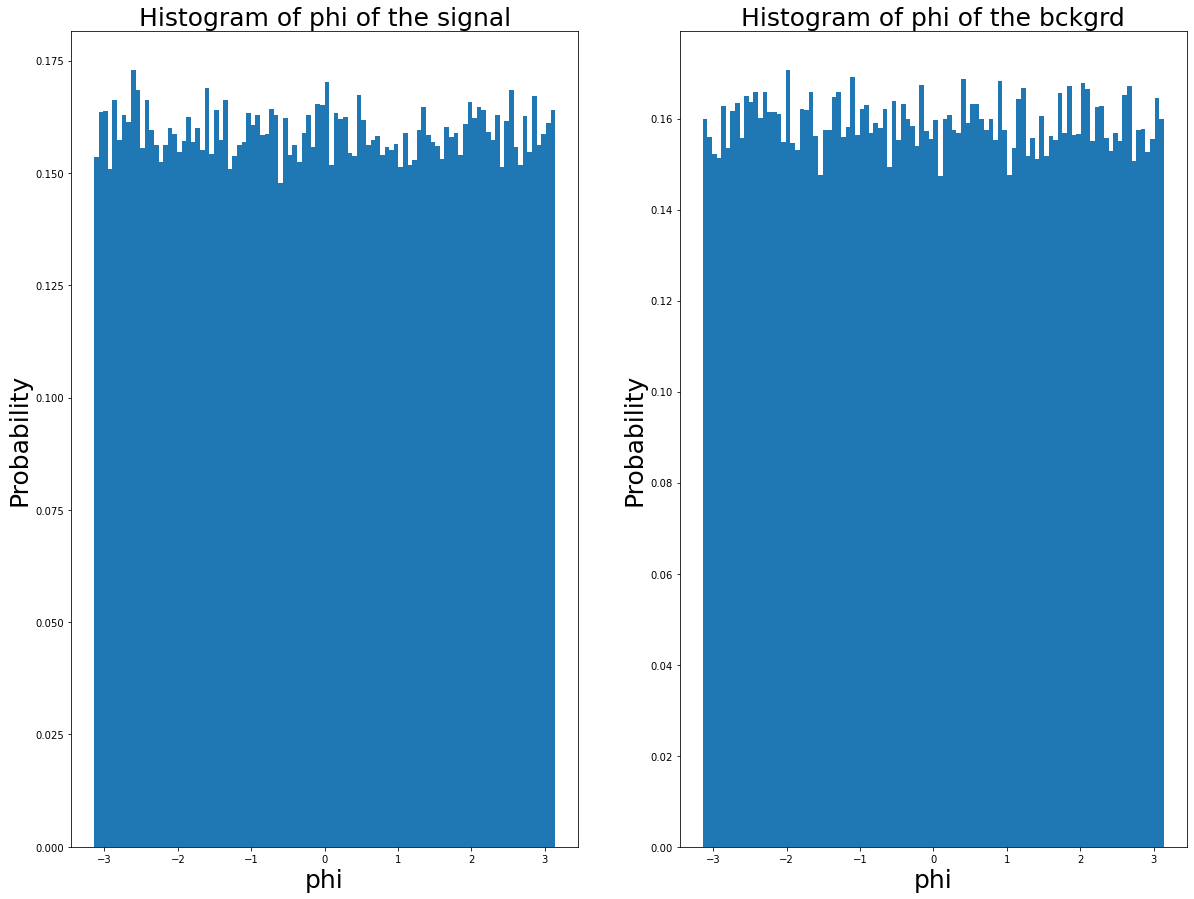

In [102]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['phi'],density=True,bins=100)
ax2.hist(background['phi'],density=True,bins=100)
ax1.set_xlabel('phi', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('Histogram of phi of the signal',size=25)
ax2.set_xlabel('phi', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('Histogram of phi of the bckgrd',size=25)

Text(0.5, 1.0, 'Histogram of mass of the bckgrd')

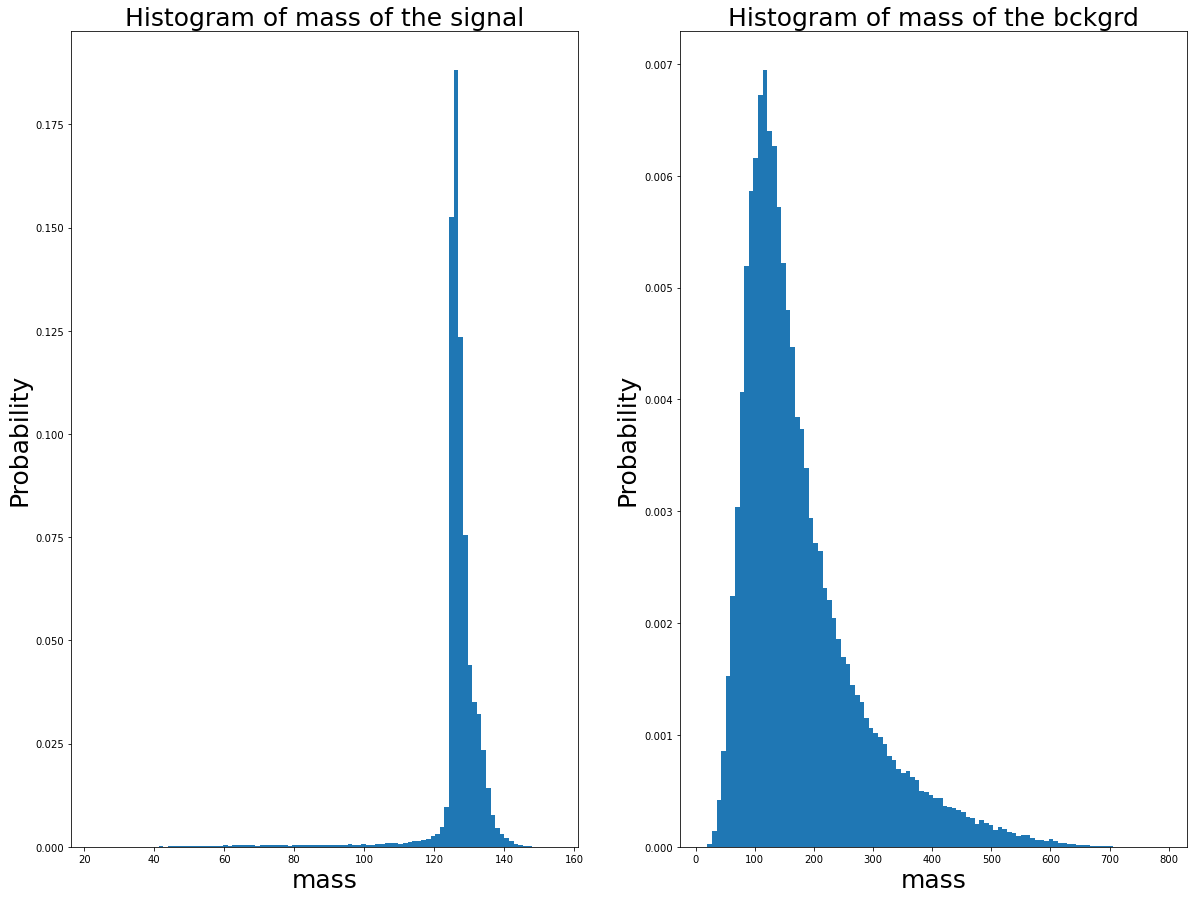

In [103]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['mass'],density=True,bins=100)
ax2.hist(background['mass'],density=True,bins=100)
ax1.set_xlabel('mass', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('Histogram of mass of the signal',size=25)
ax2.set_xlabel('mass', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('Histogram of mass of the bckgrd',size=25)

Text(0.5, 1.0, 'Histogram of ee2 of bckgrd')

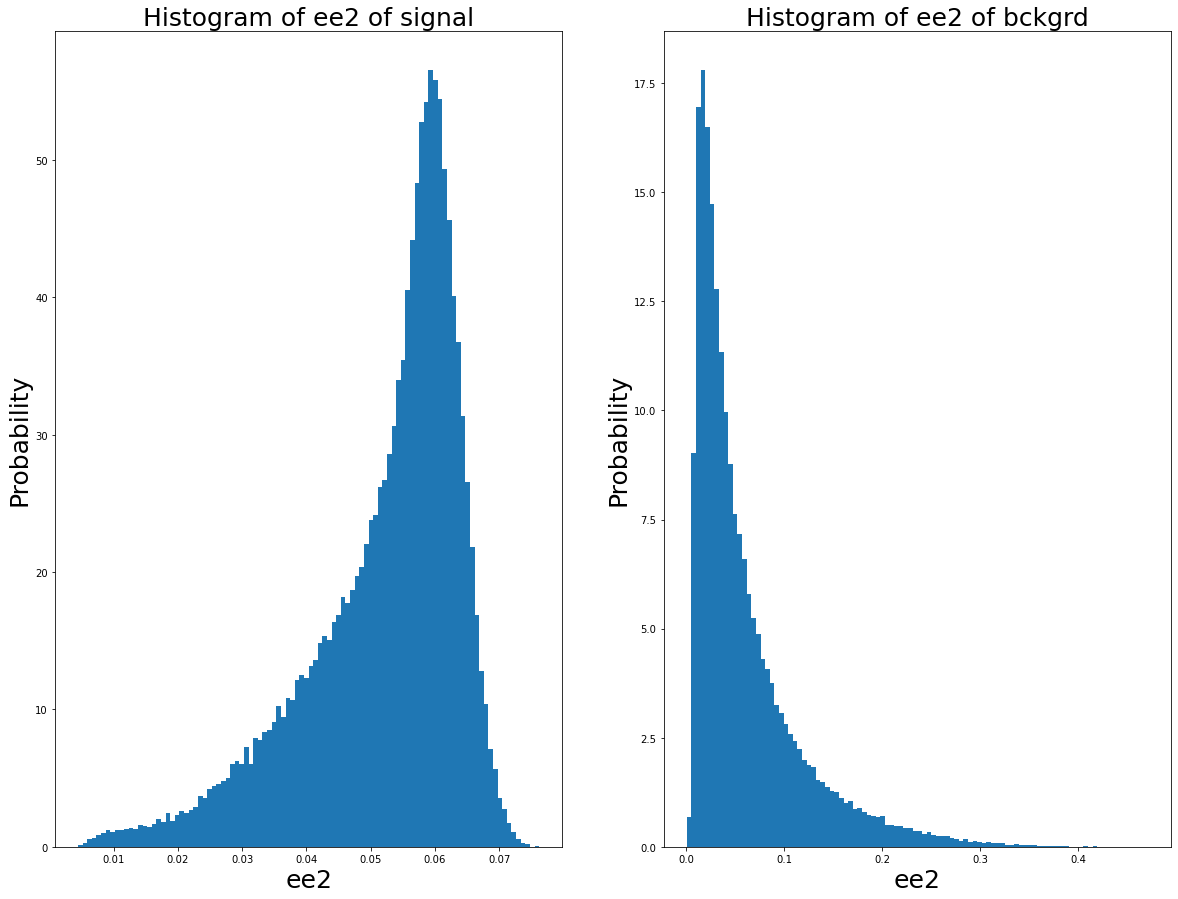

In [104]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['ee2'],density=True,bins=100)
ax2.hist(background['ee2'],density=True,bins=100)
ax1.set_xlabel('ee2', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('Histogram of ee2 of signal',size=25)
ax2.set_xlabel('ee2', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('Histogram of ee2 of bckgrd',size=25)

Text(0.5, 1.0, 'Histogram of ee3 of bckgrd')

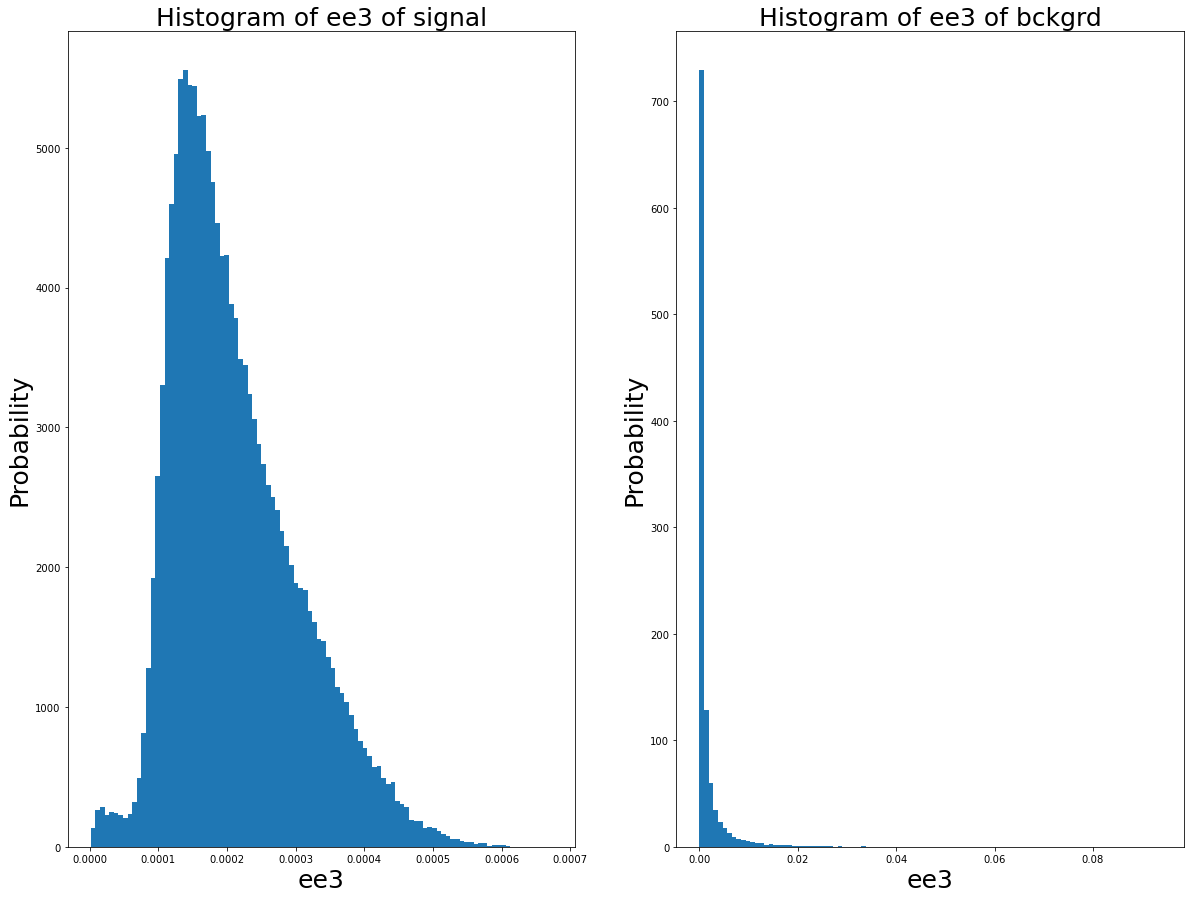

In [105]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['ee3'],density=True,bins=100)
ax2.hist(background['ee3'],density=True,bins=100)
ax1.set_xlabel('ee3', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('Histogram of ee3 of signal',size=25)
ax2.set_xlabel('ee3', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('Histogram of ee3 of bckgrd',size=25)

Text(0.5, 1.0, 'Histogram of d2 of bckgrd')

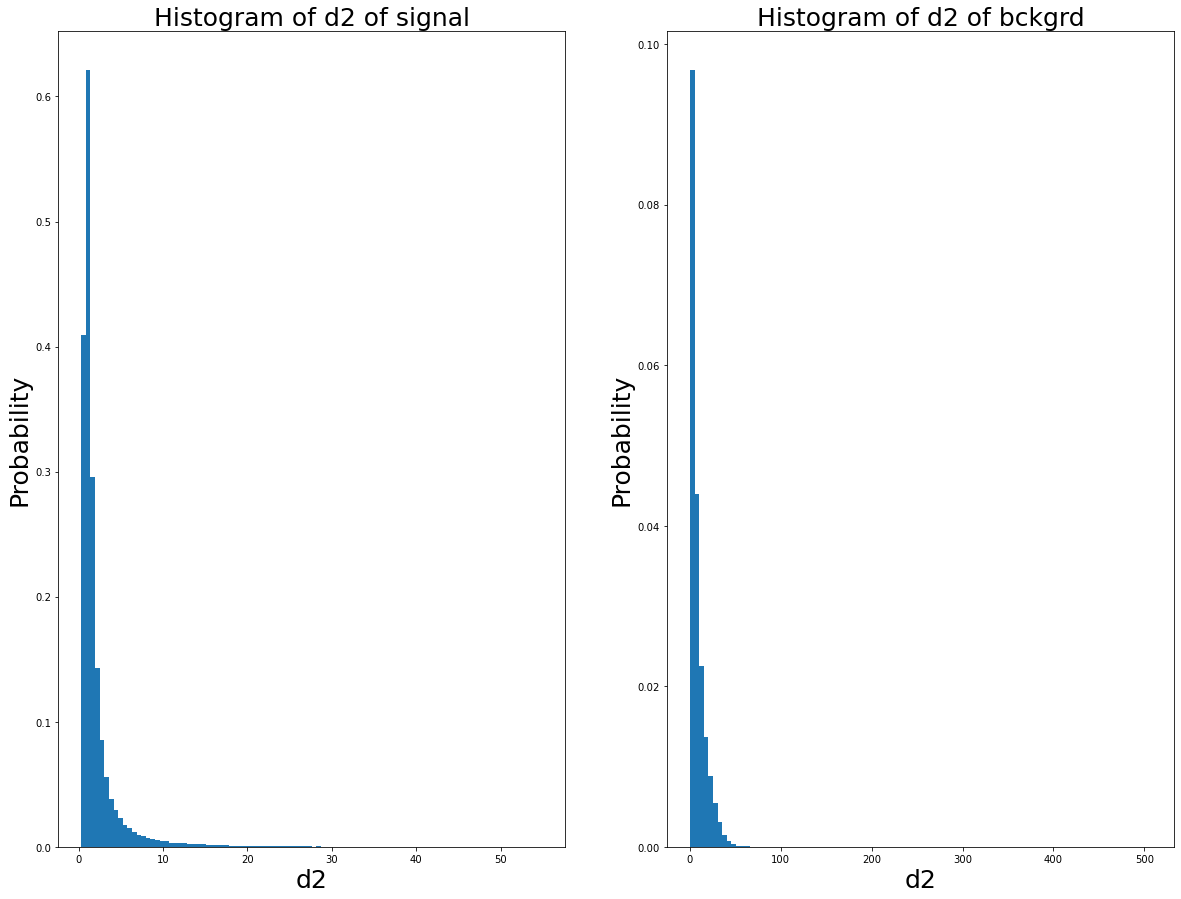

In [106]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['d2'],density=True,bins=100)
ax2.hist(background['d2'],density=True,bins=100)
ax1.set_xlabel('d2', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('Histogram of d2 of signal',size=25)
ax2.set_xlabel('d2', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('Histogram of d2 of bckgrd',size=25)

Text(0.5, 1.0, 'Histogram of angularity of signal bckgrd')

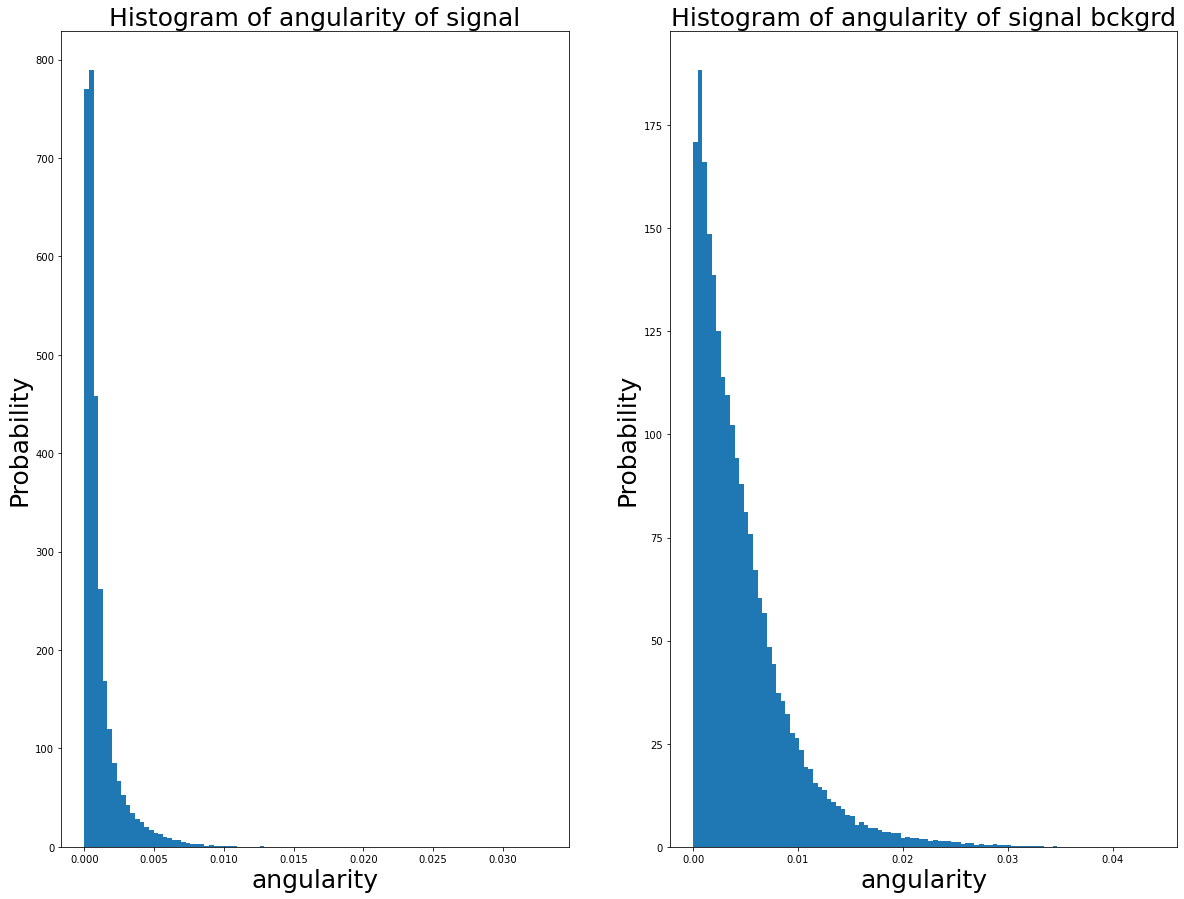

In [107]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['angularity'],density=True,bins=100)
ax2.hist(background['angularity'],density=True,bins=100)
ax1.set_xlabel('angularity', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('Histogram of angularity of signal',size=25)
ax2.set_xlabel('angularity', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('Histogram of angularity of signal bckgrd',size=25)

Text(0.5, 1.0, 'background')

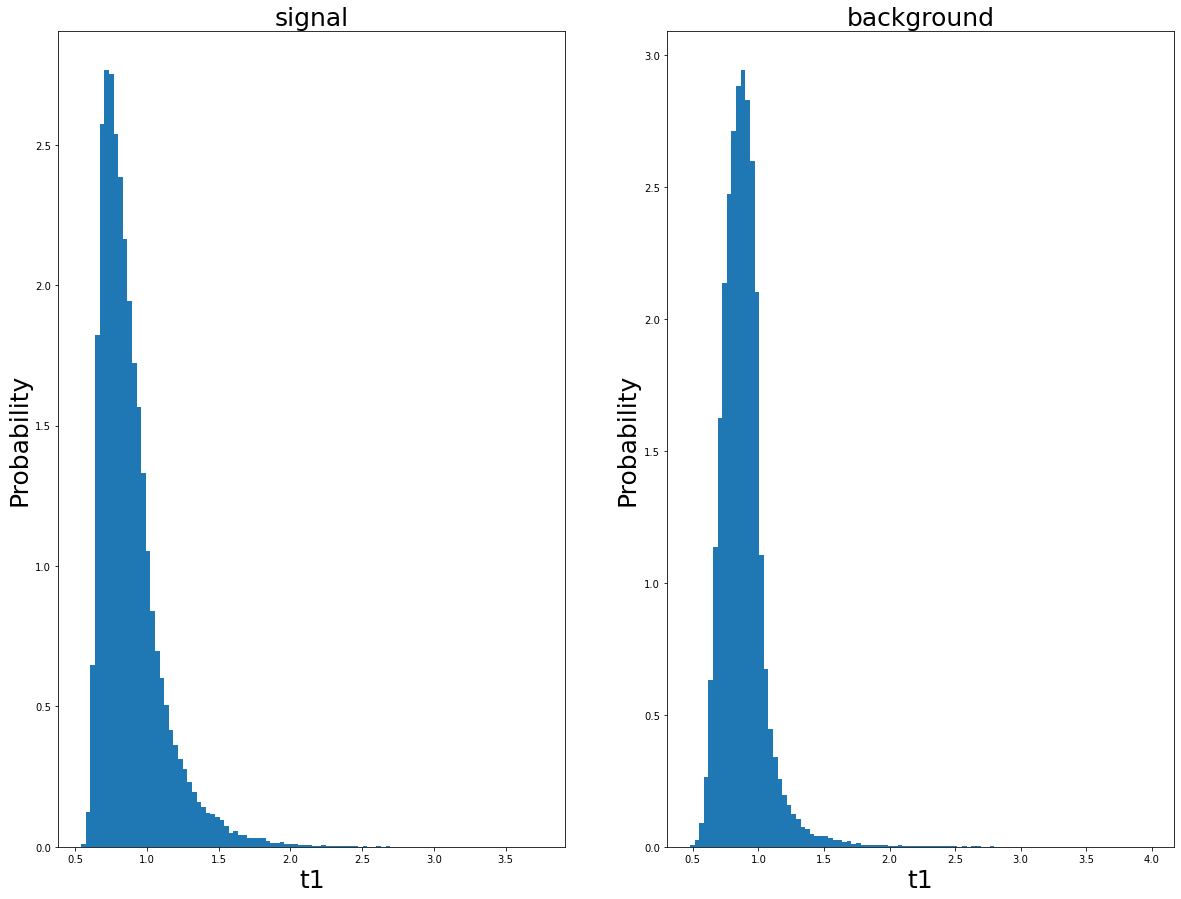

In [108]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['t1'],density=True,bins=100)
ax2.hist(background['t1'],density=True,bins=100)
ax1.set_xlabel('t1', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('signal',size=25)
ax2.set_xlabel('t1', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('background',size=25)

Text(0.5, 1.0, 'background')

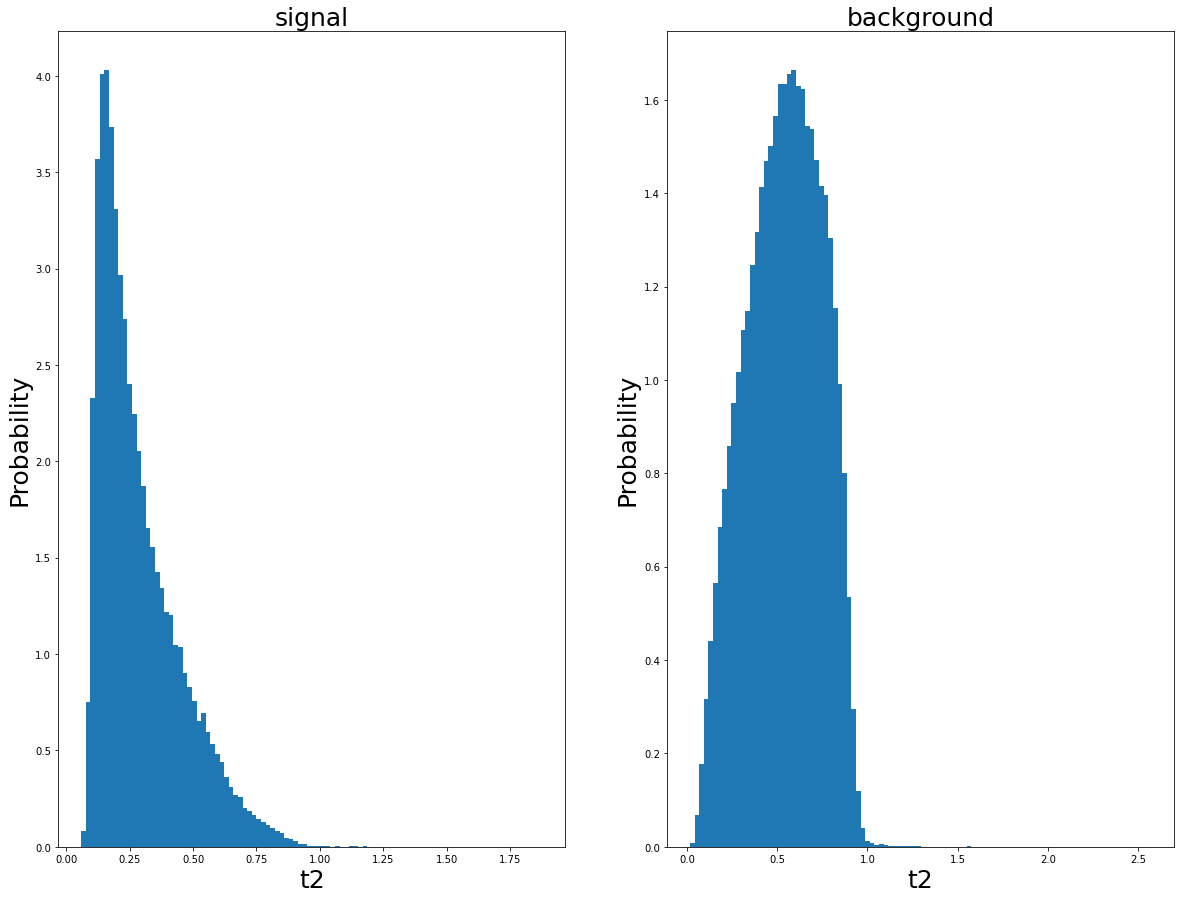

In [109]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['t2'],density=True,bins=100)
ax2.hist(background['t2'],density=True,bins=100)
ax1.set_xlabel('t2', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('signal',size=25)
ax2.set_xlabel('t2', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('background',size=25)

Text(0.5, 1.0, 'background')

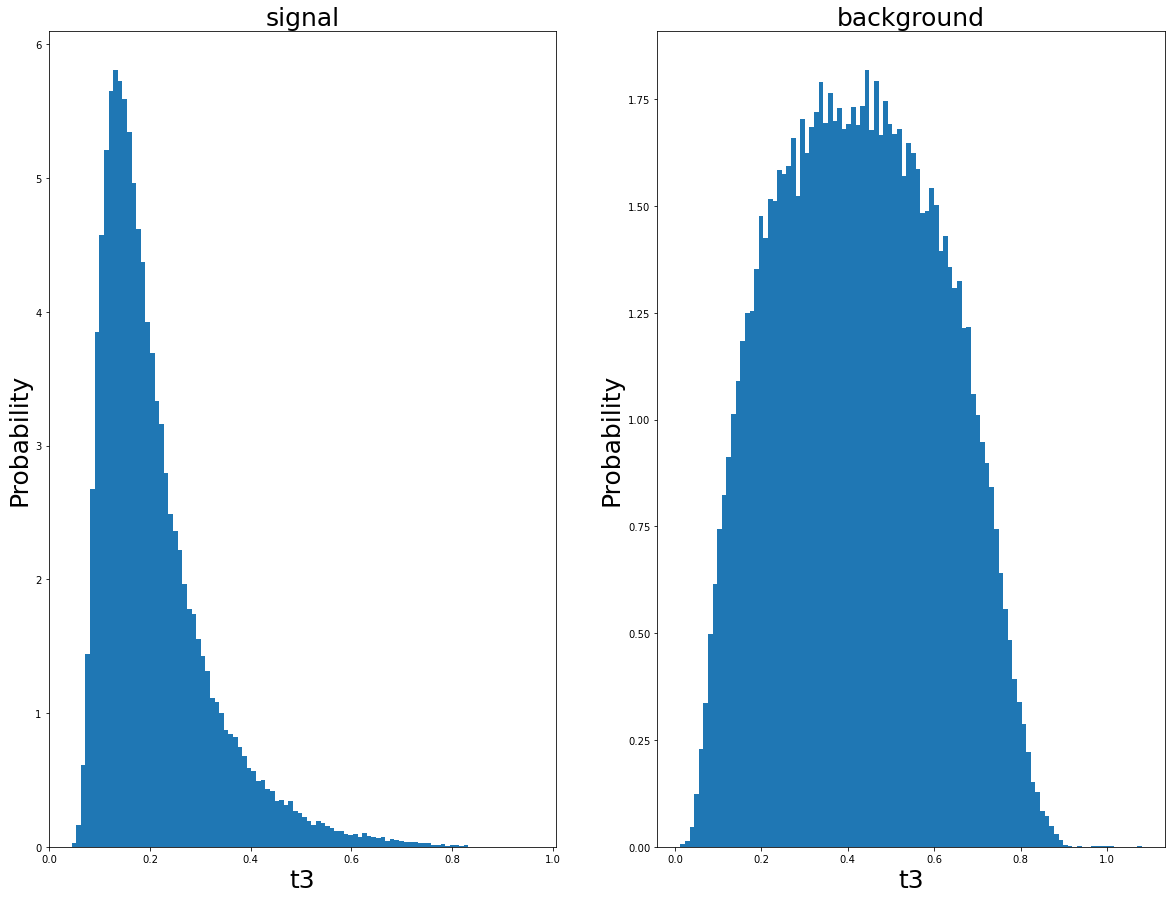

In [110]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['t3'],density=True,bins=100)
ax2.hist(background['t3'],density=True,bins=100)
ax1.set_xlabel('t3', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('signal',size=25)
ax2.set_xlabel('t3', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('background',size=25)

Text(0.5, 1.0, 'background')

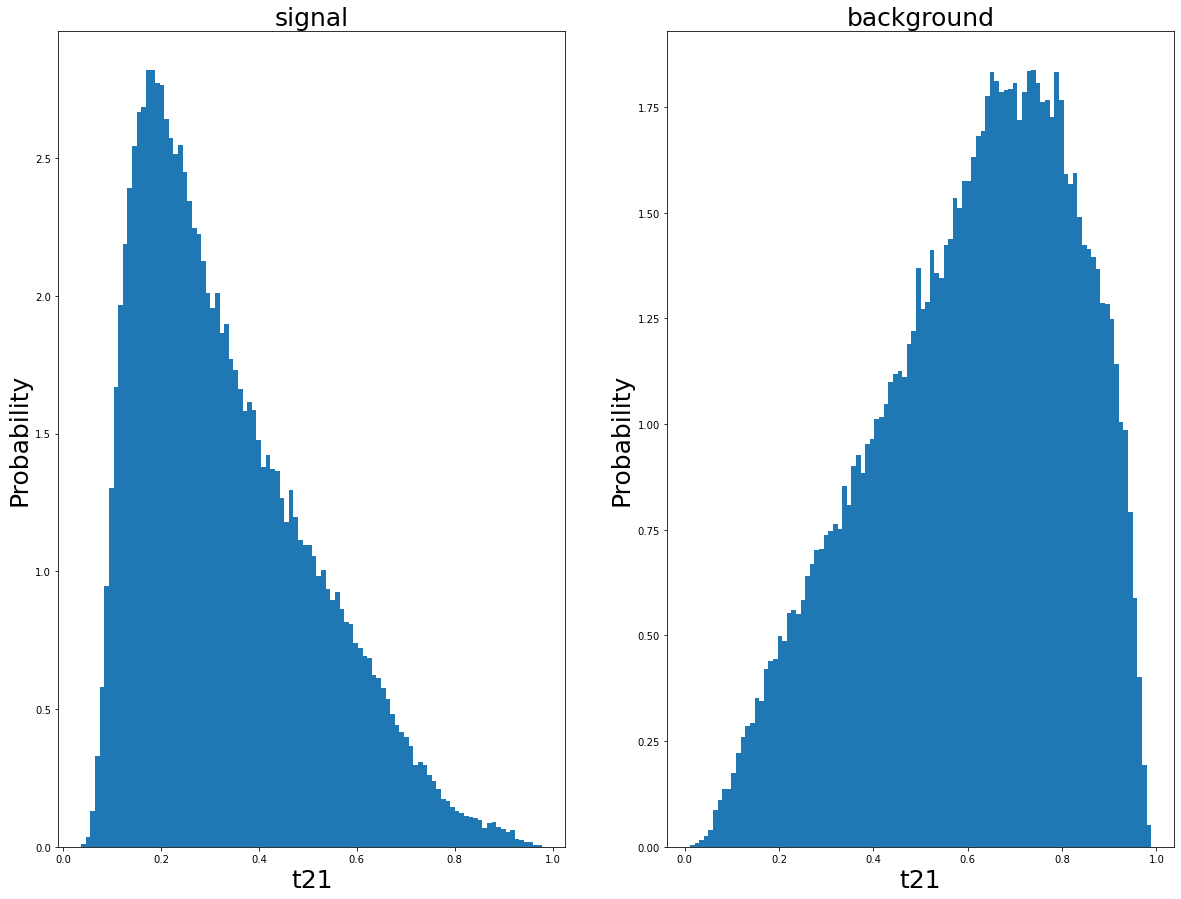

In [111]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['t21'],density=True,bins=100)
ax2.hist(background['t21'],density=True,bins=100)
ax1.set_xlabel('t21', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('signal',size=25)
ax2.set_xlabel('t21', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('background',size=25)

Text(0.5, 1.0, 'background')

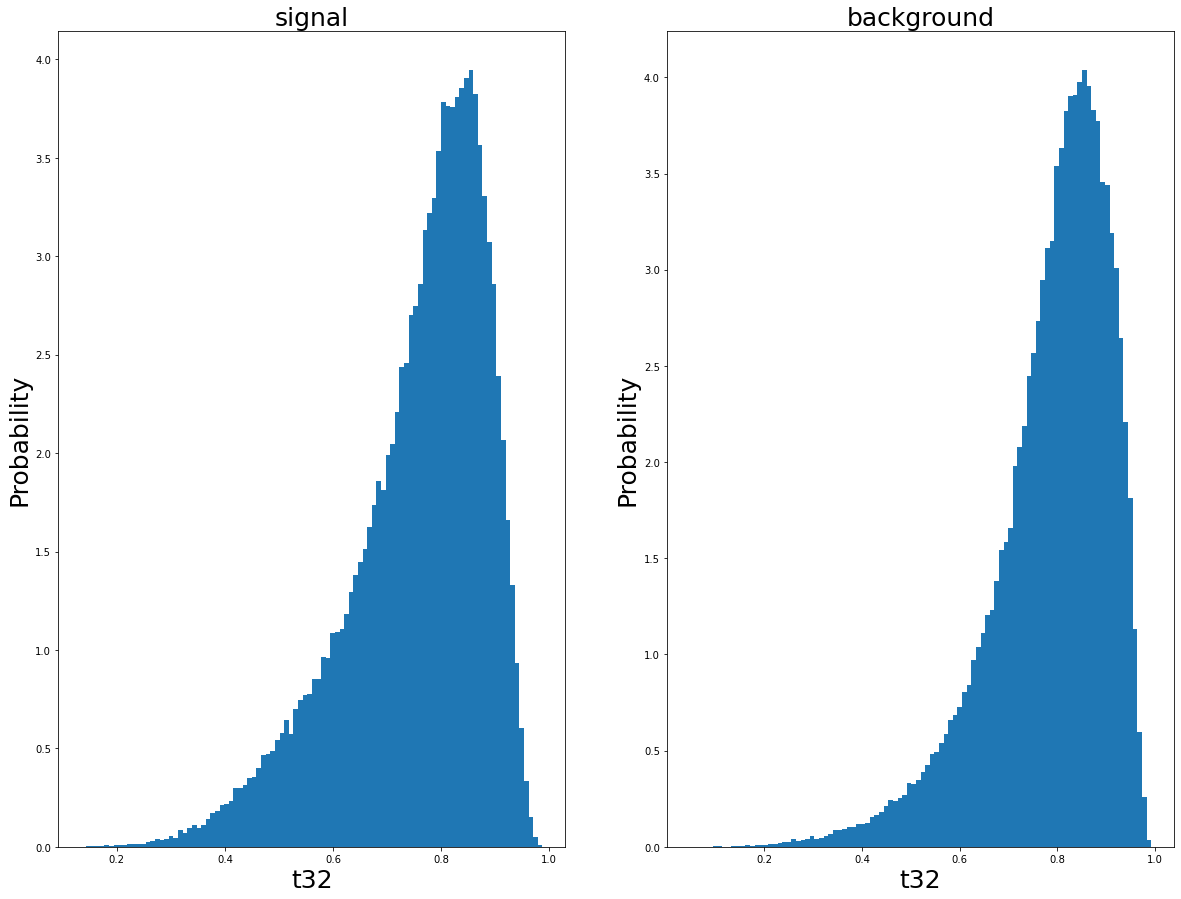

In [112]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['t32'],density=True,bins=100)
ax2.hist(background['t32'],density=True,bins=100)
ax1.set_xlabel('t32', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('signal',size=25)
ax2.set_xlabel('t32', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('background',size=25)

Text(0.5, 1.0, 'background')

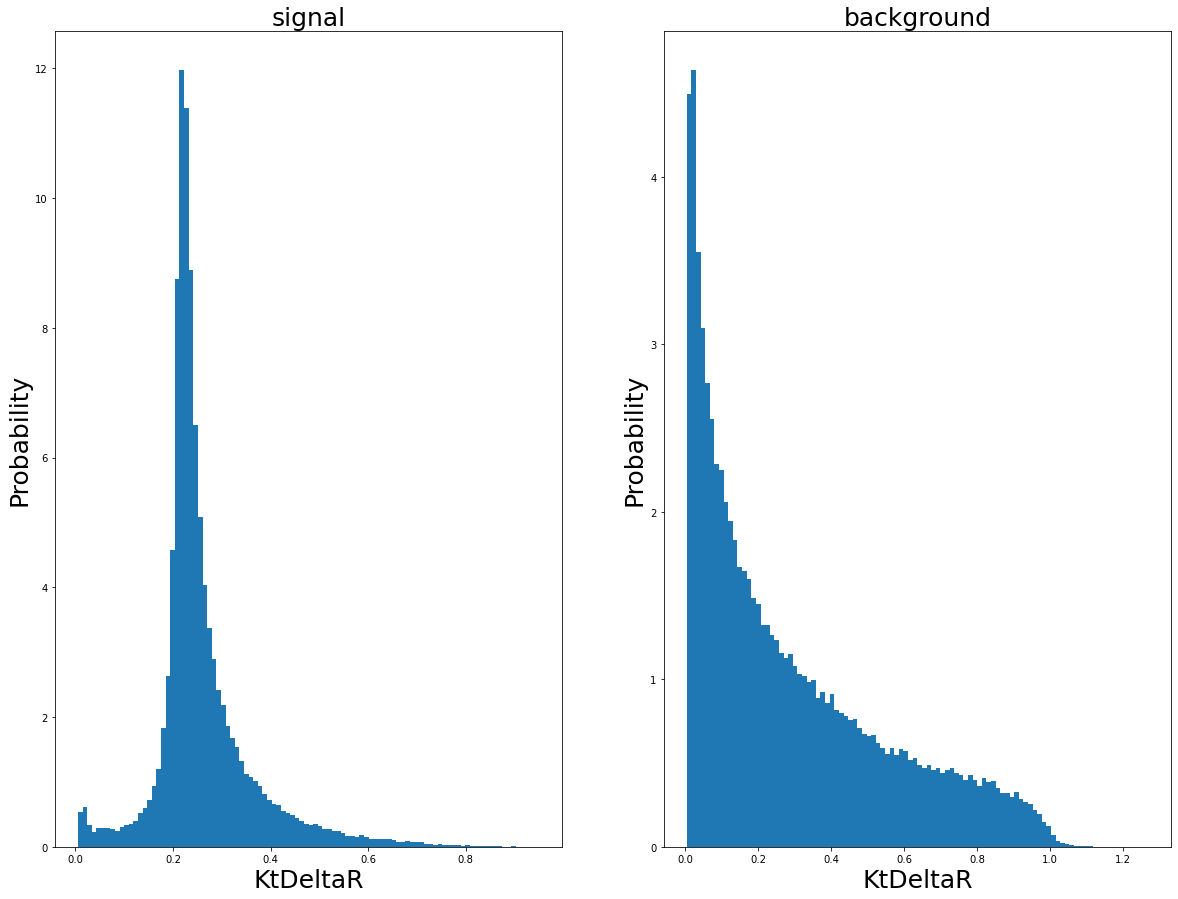

In [113]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.hist(data['KtDeltaR'],density=True,bins=100)
ax2.hist(background['KtDeltaR'],density=True,bins=100)
ax1.set_xlabel('KtDeltaR', size=25)
ax1.set_ylabel('Probability',size=25)
ax1.set_title('signal',size=25)
ax2.set_xlabel('KtDeltaR', size=25)
ax2.set_ylabel('Probability',size=25)
ax2.set_title('background',size=25)

By comparing the histograms of each features of the signal and the background, we can see that not all features provide discrimination power between signal and background. The feature eta, phi, d2, t1 and t32 are hard to discriminate between the signal and background. The pt, mass, ee2, ee3, t2, t3, t21, KtDeltaR are provide discrimination power between signal and background.

Look like mass and ee2, t2 and t3 have correlation since their distribution look similar for the signal and background.

In [125]:
#from sklearn import preprocessing
#s=data['t21']
#b=background['t21']
#sample=np.hstack((s,b))
#nor=preprocessing.normalize([sample])
#print(np.mean(nor))


0.0019966072156795828


[1 2 3 4 5 6]
